# Assessment 2019

## Machine Learning and Statistics

### Student: G00364696




### Contents and Assignment Objectives
- [Introduction](#Introduction)


- [Describe](#Describe) Use descriptive statistics and plots to describe the Boston House Prices dataset


- [Infer](#Infer)
Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.


- [Predict](#Predict)
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

(Click on link in section title to go to section)

In [1]:
# import Libraries required for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import keras as kr


Using TensorFlow backend.


<a id="Intrpduction"></a>

In this section, we will use drscriptive statistics to describe the Boston 

### Origin of the dataset:
Each record in the dataset describes a boston suburb or town. The data in the Boston House Price dataser was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) from 1970 and collated in 1978. Each record in the dataset describes a boston suburb or town. There are 506 records in the dataset, with 14 variables representing information that may be related to that town.


These variables are:

- CRIM	
    Per capita crime rate by town
- ZN	
    Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS	
    Proportion of non-retail business acres per town
- CHAS	
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX	
    Nitric oxides concentration (parts per 10 million)
- RM	
    Average number of rooms per dwelling
- AGE	
    Proportion of owner-occupied units built prior to 1940
- DIS
    Weighted distances to five Boston employment centres
- RAD	
    Index of accessibility to radial highways
- TAX	
    Full-value property-tax rate per 10,000 USD
- PTRATIO	
    Pupil-teacher ratio by town
- B	1000
    (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT
    % lower status of the population
- MEDV	
    Median value of owner-occupied homes in $1000's

Note that the name of the district is not among the variables.

The "target" variable is MEDV, the median value of owner occupied homes (in $1,000s). A number of previous analyses seem to suggest that 16 data points under MEDV may conatin missing or censored values, and it may be worth considering if these should be removed. 

For this project, a copy of the dataset has been downloaded from the open machine learning website (www.openml.org), although other sources were available. For example, in an earlier version of this project, the data was accessed as a module imported from the sklearn package

A dataframe will be created from this csv file using the pandas read_csv method. Then summary statistics will be generated using the pandas describe function.


<a id="Describe"></a>

## Describe

### Getting Started: Creating a dataframe


In [2]:
# loading the boston house price dataset and converting to pandas dataframe

boston = pd.read_csv('boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
# Generating summary statistics using the pandas describe method.
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Analysing the variance in median house prices by town/suburb

Our main interest is the house price (MEDV). Therefore, the first step we should do is to eyeball the values in this field. The snippets of python code in the values in the MEDV field ascending order. To visualise the variance in house prices, a boxplot and then a histogram will be created

In [4]:
# code to create a sorted list of house price values:
l = list(boston['MEDV'])
l.sort()
print(l)
print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.


[5.0, 5.0, 5.6, 6.3, 7.0, 7.0, 7.2, 7.2, 7.2, 7.4, 7.5, 8.1, 8.3, 8.3, 8.4, 8.4, 8.5, 8.5, 8.7, 8.8, 8.8, 9.5, 9.6, 9.7, 10.2, 10.2, 10.2, 10.4, 10.4, 10.5, 10.5, 10.8, 10.9, 10.9, 11.0, 11.3, 11.5, 11.7, 11.7, 11.8, 11.8, 11.9, 11.9, 12.0, 12.1, 12.3, 12.5, 12.6, 12.7, 12.7, 12.7, 12.8, 13.0, 13.1, 13.1, 13.1, 13.1, 13.2, 13.3, 13.3, 13.3, 13.4, 13.4, 13.4, 13.4, 13.5, 13.5, 13.6, 13.6, 13.8, 13.8, 13.8, 13.8, 13.8, 13.9, 13.9, 14.0, 14.1, 14.1, 14.1, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.5, 14.6, 14.6, 14.8, 14.9, 14.9, 14.9, 15.0, 15.0, 15.0, 15.1, 15.2, 15.2, 15.2, 15.3, 15.4, 15.4, 15.6, 15.6, 15.6, 15.6, 15.6, 15.7, 16.0, 16.1, 16.1, 16.1, 16.2, 16.2, 16.3, 16.4, 16.5, 16.5, 16.6, 16.6, 16.7, 16.7, 16.8, 16.8, 17.0, 17.1, 17.1, 17.1, 17.2, 17.2, 17.2, 17.3, 17.4, 17.4, 17.4, 17.5, 17.5, 17.5, 17.6, 17.7, 17.8, 17.8, 17.8, 17.8, 17.8, 17.9, 18.0, 18.1, 18.2, 18.2, 18.2, 18.3, 18.3, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.8, 18.9, 18.

Now, we will visualise the variance in the data by way of a boxplot and a histogram.

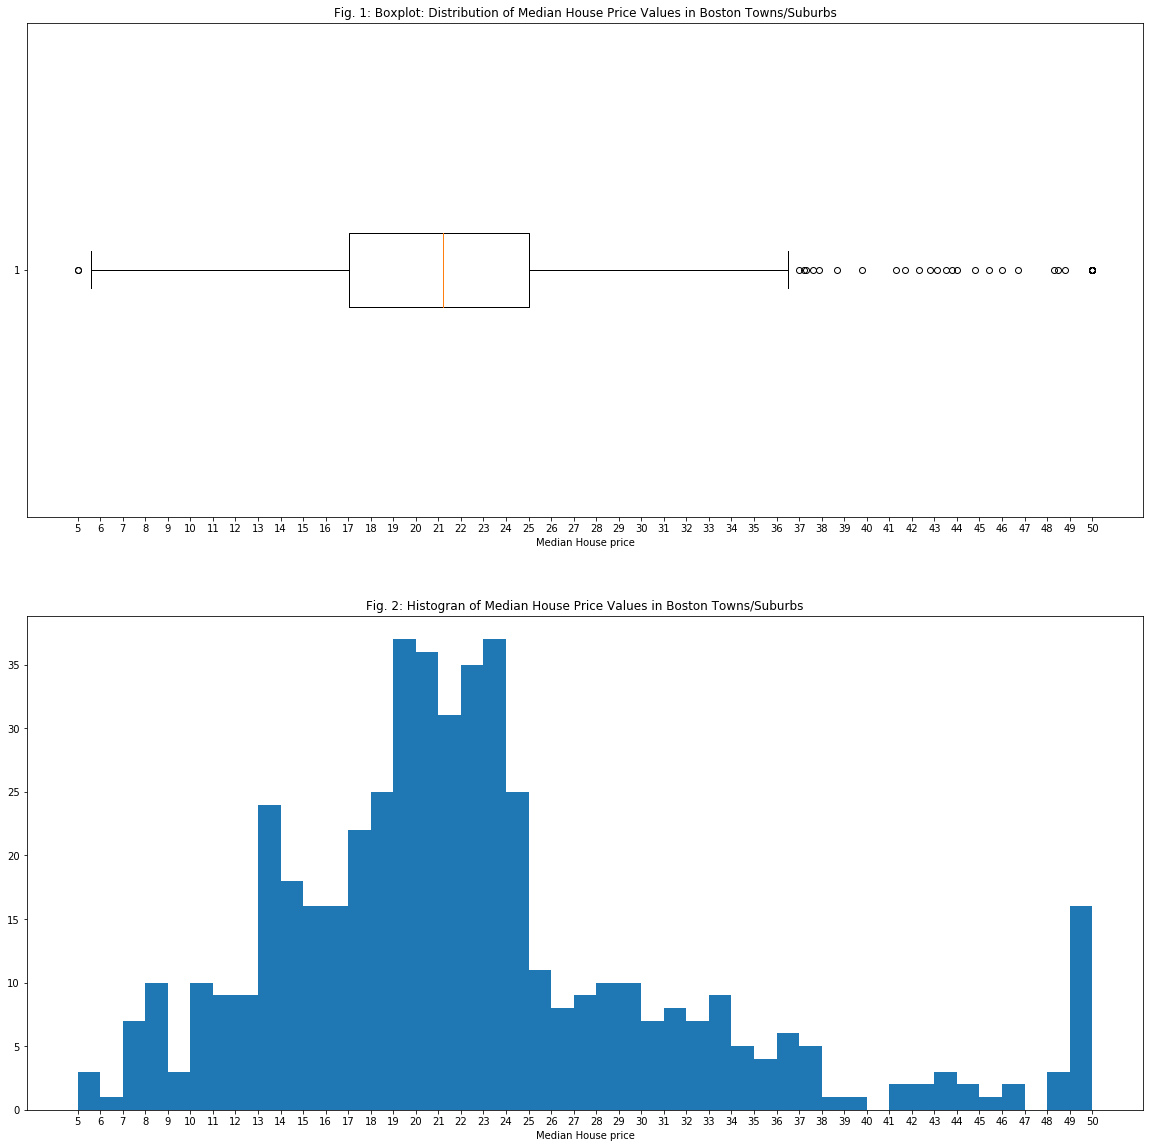

In [5]:
# create a numpy array from the MEDV (median value) column in the boston dataset

plt.rcParams['figure.figsize'] = [20,20]

price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

### Initial observations. 

As can be seen from the above plots (and the descriptive statistics generated above), the mean price is roughly \\$23K. The boxplot shows a dataset that is centred around this mean with most of values lying between \\$ 17 and about  \\$ 25  (the 25% and 75% percentile points). The histogram shows a dataset which could almost conform to a normal distribution, were it not for the outliers above the \\$ 25K point.

The most common value in the data set is 50, a value that occurs in 16 rows. A number of analysts who have worked on this datset have suggested that that these data points represent missing or censored data values. They do appear as outliers and this approach may have merit. The following code snippets remove the 16 rows with MEDV = 50.

Then code below will re-do the boxplot and histogram.

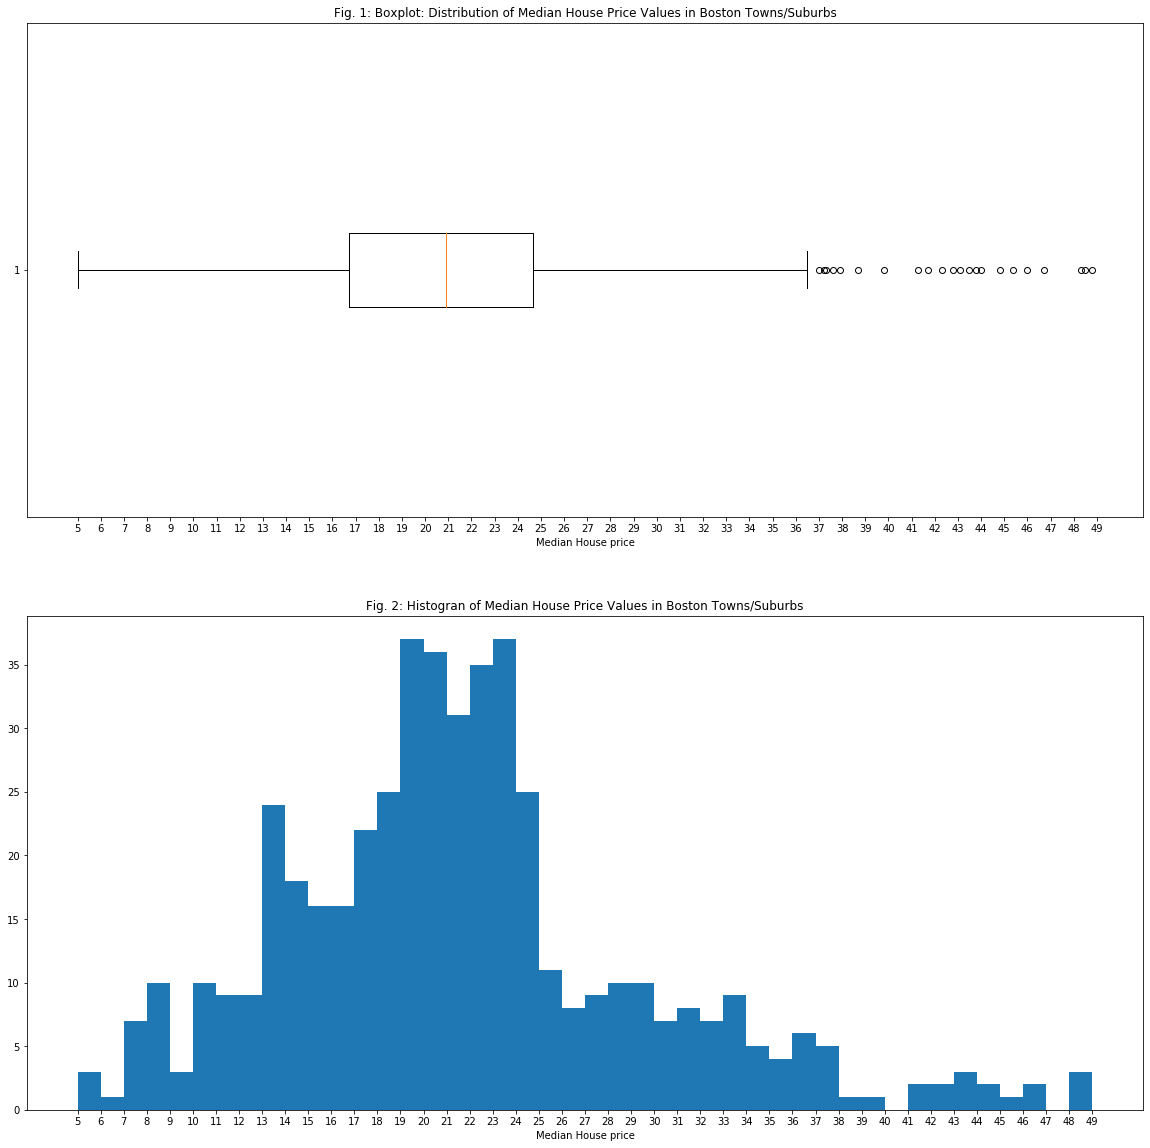

In [6]:
# code to remove the 16 rows where MEDV == 50

# l = list(boston[boston['MEDV']!=50])
# l.sort()
# print(l)
# print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.

plt.rcParams['figure.figsize'] = [20,20]

boston = boston[boston['MEDV'] != 50.0]
price = boston['MEDV']

price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

### Revised table of descriptive statistics.

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [ ]:
### Next steps: Exploring relationships


Victor Roman:
"The essential features for the project are: ‘RM’ (number of rooms), ‘LSTAT’ (lower status of the population), ‘PTRATIO’ (Pupil-teacher ratio) and ‘MEDV’. The remaining features have been excluded".
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
see also http://kitmarks.com/boston_housing.html


see also ... https://www.researchgate.net/publication/245315755_Visualizable_and_interpretable_regression_models_with_good_prediction_power


Terminology: Target Variable (MEDV) vs 'feature' variables.

Q - should we do a correlation matrix? e.g. like https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
code would be  ... 
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

what might we learn from this?


In [8]:
plt.rcParams['figure.figsize'] = [20,20]

In this next subsections, we will create scatterplots with lines of best fit to see if we can identify relationships between selected 'feature' variables and the Median House Price for each town.


We will begin by looking at demographics. We have two demographic variables, namely Lower Status and B, related to the number of african americans in an area. We also have two related variables, the extent of criminality and the pupil-teacher ratio (which may be inversely related to educational attainment).


### Exploring the relationship between pupil-teacher ratio, social status, race and criminality and median house price.

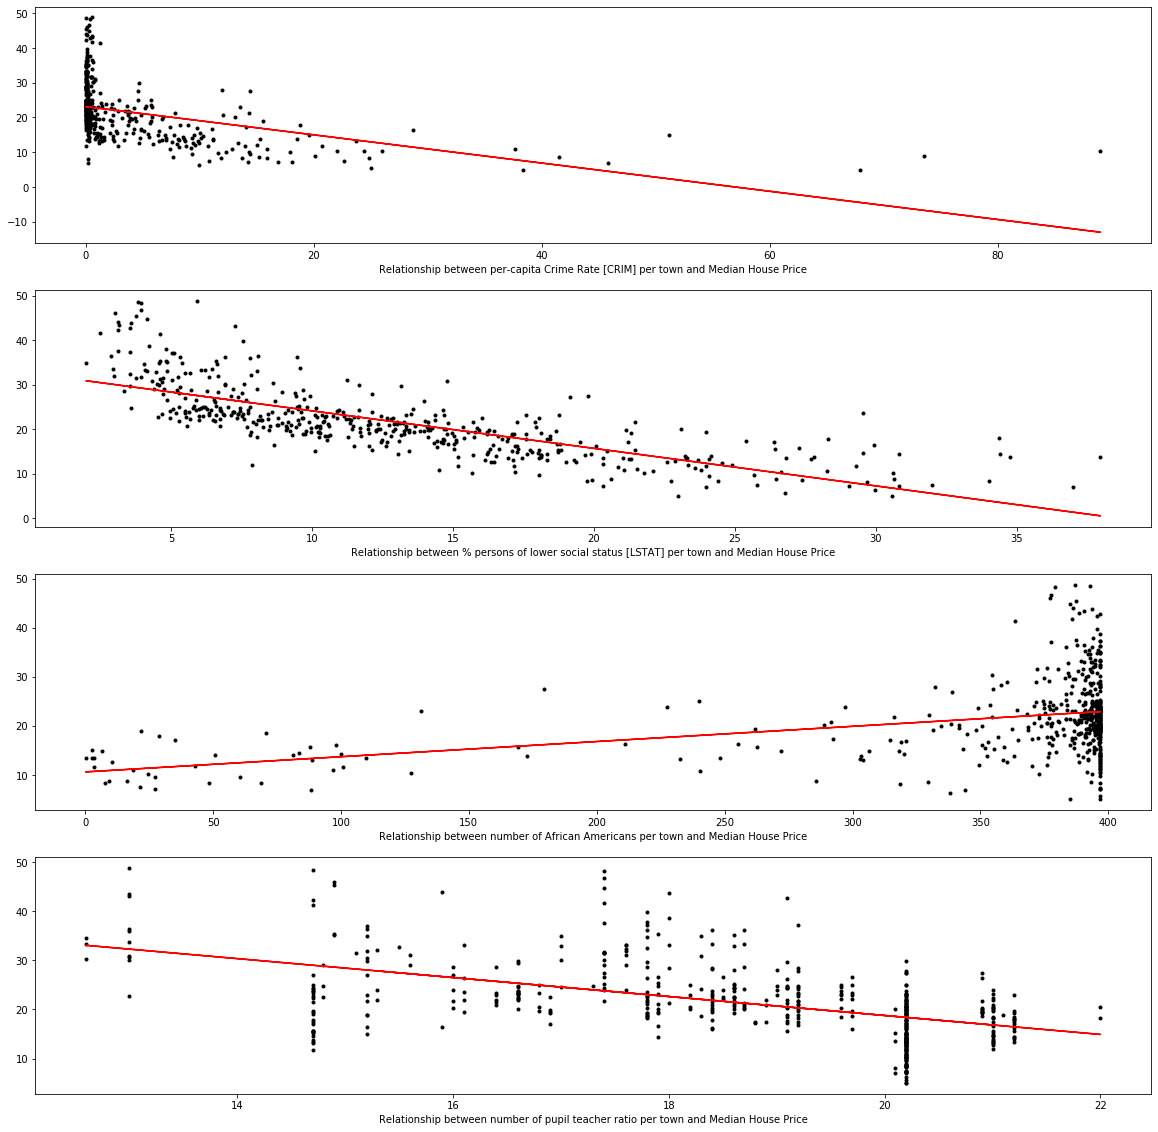

In [9]:

# use numply polyfit to get parameters of the equation of the line of best fit
# m = np.polyfit(x,y,1)[0]
# c = np.polyfit(x,y,1)[1]

plt.subplot(4,1,1)
# Plot relationship between criminality and house price
x = boston['CRIM']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between per-capita Crime Rate [CRIM] per town and Median House Price")
plt.subplot(4,1,2)
# Plot relationship between social status and house price
x = boston['LSTAT']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between % persons of lower social status [LSTAT] per town and Median House Price")
# Plot relationship between the number of african americans in an area and house price
plt.subplot(4,1,3)
x = boston['B']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of African Americans per town and Median House Price")
# Plot relationship between the pupil-teacher ratio in an area and house eprice
plt.subplot(4,1,4)
x = boston['PTRATIO']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of pupil teacher ratio per town and Median House Price")

plt.show()


## Comment:

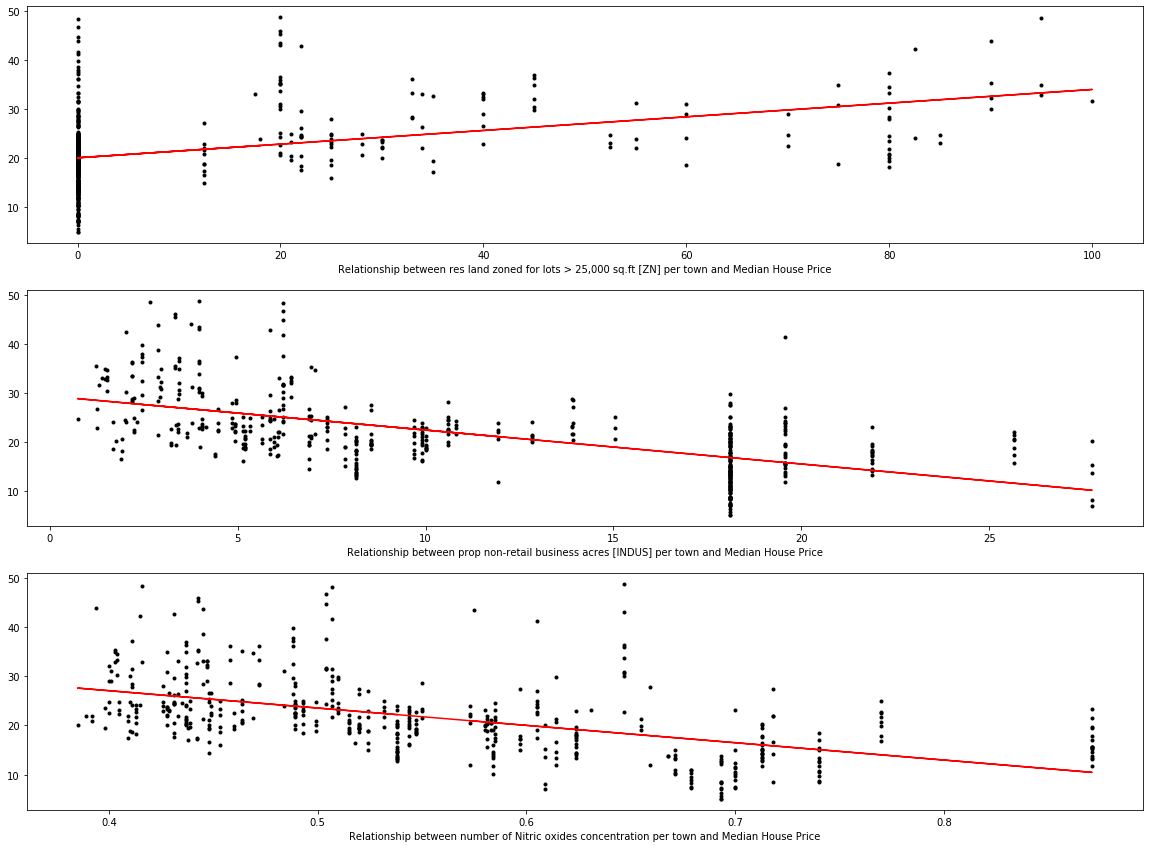

In [10]:
# Impact of industry and urban development

# assuming that Nitric oxides are something bad, resulting from industrial and urban development

plt.subplot(4,1,1)
# Plot relationship between residential land zoned for lots > 25,000 sq.ft and house price
x = boston['ZN']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between res land zoned for lots > 25,000 sq.ft [ZN] per town and Median House Price")
plt.subplot(4,1,2)
# Plot relationship between prop non-retail business acres and house price
x = boston['INDUS']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between prop non-retail business acres [INDUS] per town and Median House Price")
# Plot relationship between the number of Nitric oxides concentration per town and house price
plt.subplot(4,1,3)
x = boston['NOX']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of Nitric oxides concentration per town and Median House Price")

plt.show()

### Comment

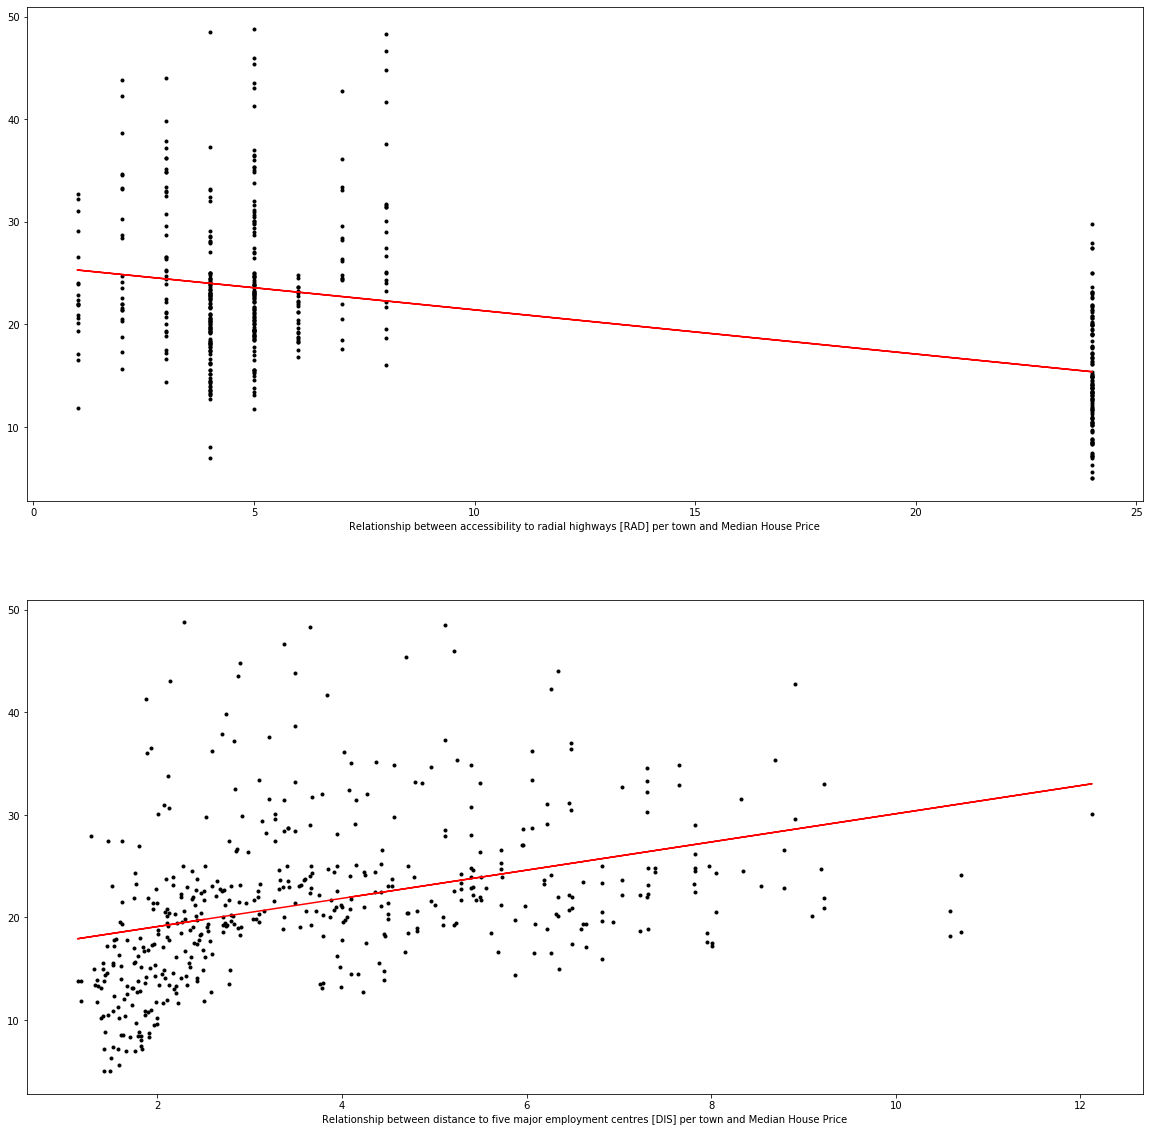

In [11]:
# Location Location

plt.subplot(2,1,1)
# Plot relationship between accessibility to radial highways and house price
x = boston['RAD']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between accessibility to radial highways [RAD] per town and Median House Price")
plt.subplot(2,1,2)
# Plot relationship between distance to five major employment centres and house price
x = boston['DIS']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between distance to five major employment centres [DIS] per town and Median House Price")
plt.show()

### Comment

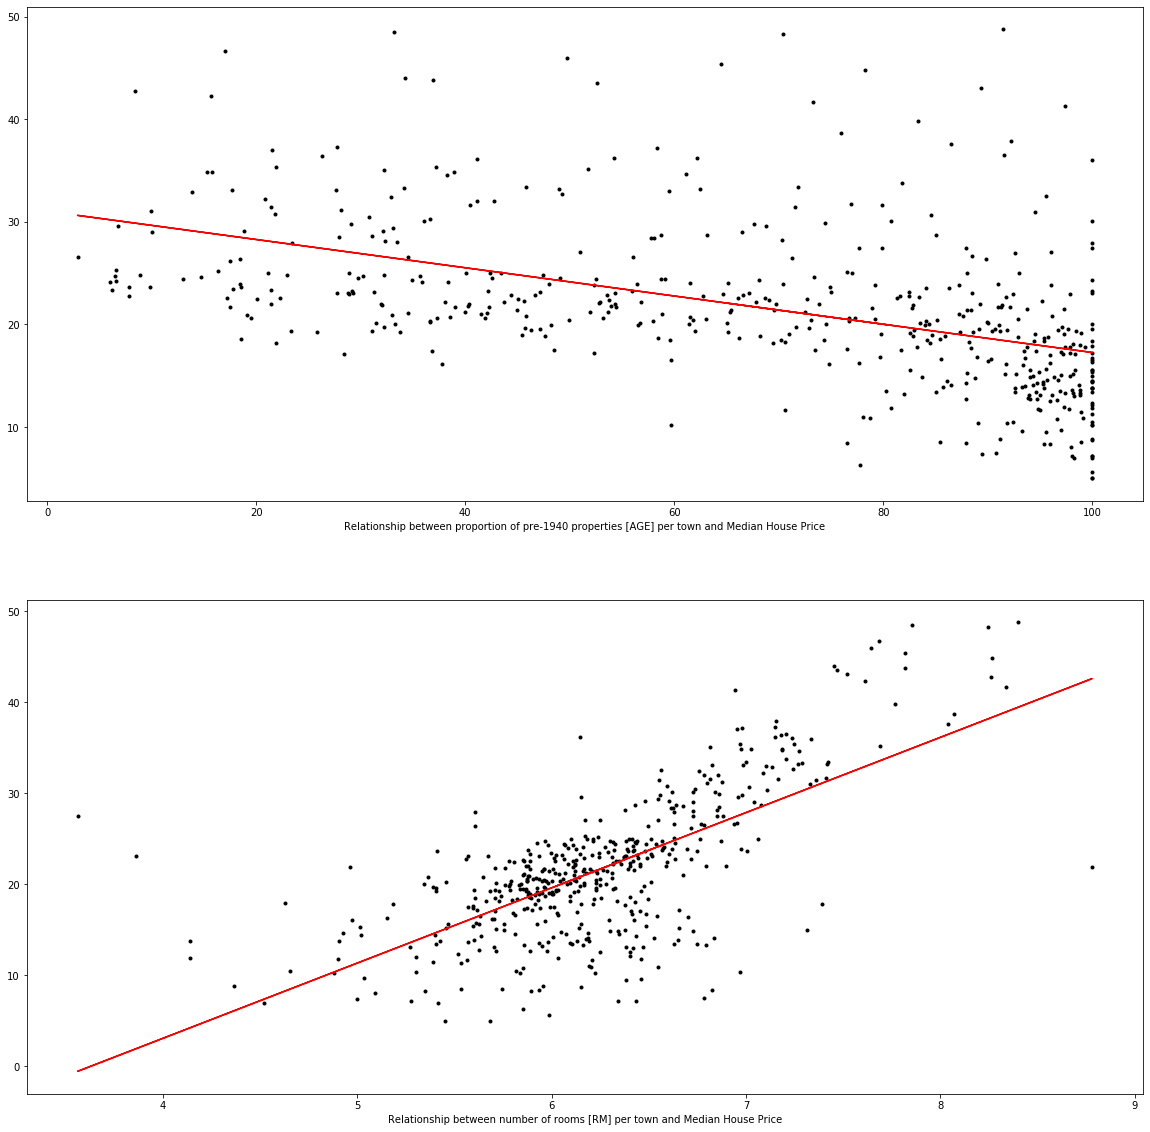

In [12]:
# Property characteristics

plt.subplot(2,1,1)
# Plot relationship between age, i.e. located in an area with a higher number of owner-occupied properties built pre-1940
x = boston['AGE']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between proportion of pre-1940 properties [AGE] per town and Median House Price")
plt.subplot(2,1,2)
# Plot relationship between distance to five major employment centres and house price
x = boston['RM']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of rooms [RM] per town and Median House Price")
plt.show()

Observations

use 
correlation_matrix = boston.corr().round(2)
annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

to show correlations close to 1 of relevant variables as an alternative way to look at relationships.

<a id="Infer"></a>

# Infer

In this section we will perform a two sample t-test to see if there is a significant difference between the median house prices of houses along the Charles river and those that aren't.

Q - does it have to be a T-test? whay 

Discuss aims of t-test. 

The aims of a Two sample T-test are see if there is a dignificant difference between the means of two populations based on samples from the respective populations. The implicit "null" hypothesis is that there is no significant difference between the two populations.

We will look at the p-value. This is the probability of observing a sample statistic as extreme as the test statistic. If the p-value is > the significance level of 0.05, the significance level will not be rejected.

Two samples. 

Samples are independent
Each population is 20 times larger than its respective sample

sample distribution is normal



What constitutes significant difference in this context?

Explanation of findings and what we can learn from T-Tests

(1) State the hypothesis

(2) Formulate an analysis plan (i.e. get samples)

(3) Analyze sample data

(4) Interpret results.



In [15]:
# code to get samples - now, what is the minimum and/or maximum number of samples needed for a viable T-test? See notes
# and re-read wikipedia and e-books where covered.


# Take excerpt from datset, two columns, CHAS and MEDV

df = boston[['CHAS','MEDV']]
df
# break into two populations

popCHAS = df[df['CHAS'] == 1]
popNotCHAS = df[df['CHAS'] == 0]

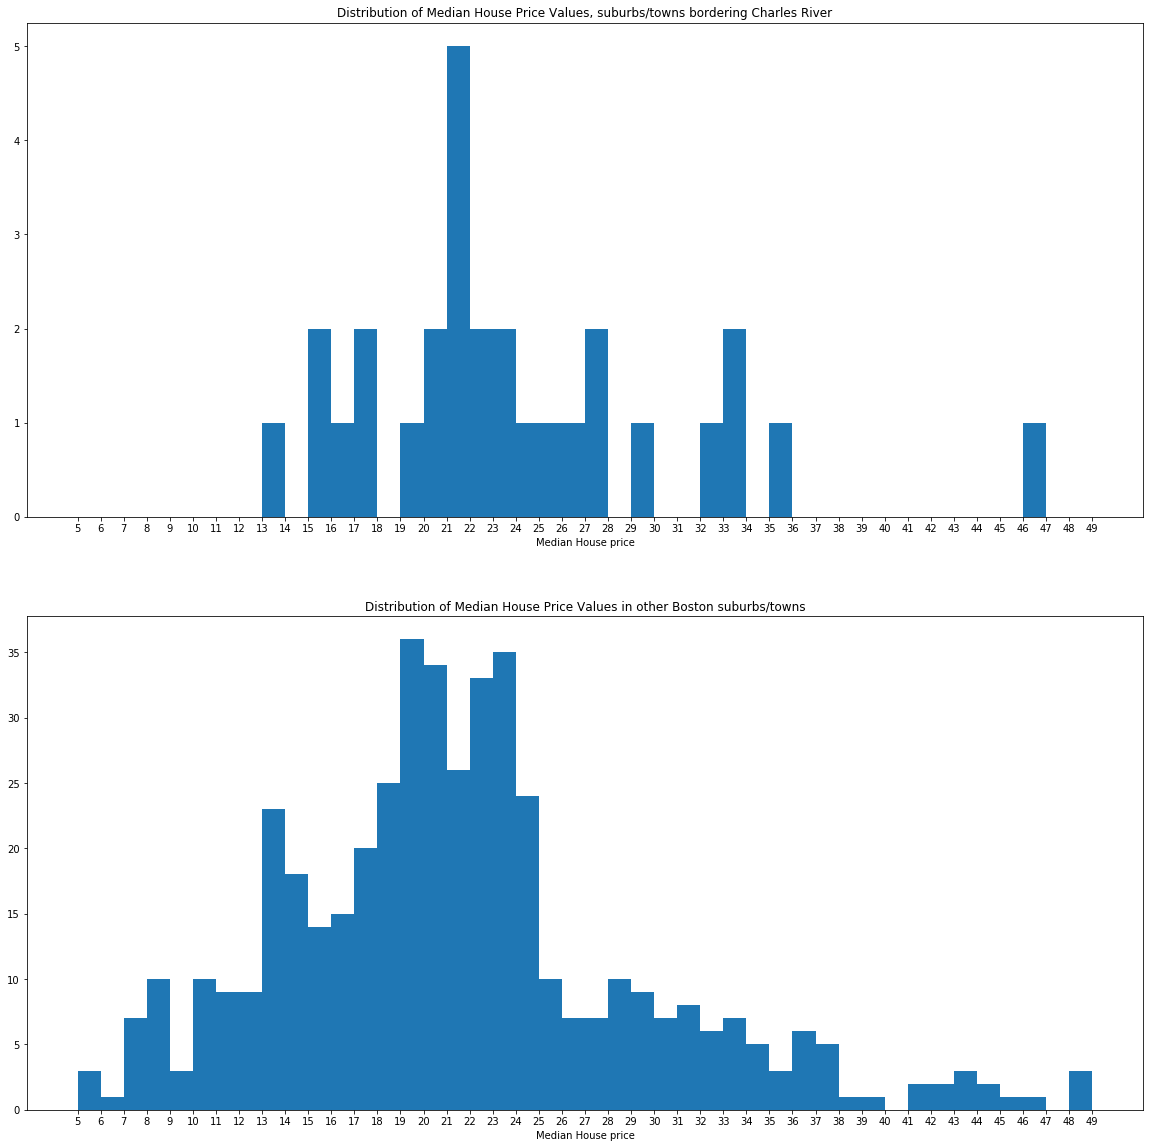

In [16]:
# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.hist(popCHAS['MEDV'], bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Distribution of Median House Price Values, suburbs/towns bordering Charles River")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(popNotCHAS['MEDV'], bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Distribution of Median House Price Values in other Boston suburbs/towns")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

In [18]:
popCHAS.describe()

,CHAS,MEDV
count,29.0,29.000000
mean,1.0,23.979310
std,0.0,7.024161
min,1.0,13.400000
25%,1.0,20.000000
50%,1.0,22.400000
75%,1.0,27.000000
max,1.0,46.000000


In [19]:
popNotCHAS.describe()

,CHAS,MEDV
count,461.0,461.000000
mean,0.0,21.488503
std,0.0,7.898848
min,0.0,5.000000
25%,0.0,16.500000
50%,0.0,20.600000
75%,0.0,24.500000
max,0.0,48.800000


We can see from above that the mean of the respective populations are 23.98 and 21.49. The question for this analysis is does this constitute a statistically significant diffference?





In [ ]:
# Analysing the populations

In [ ]:
# creating the sample sets

In [ ]:
# running the T-test

In [ ]:
# interpreting the results

<a id="Predict"></a>
## Predict

The aim of this section is to create a nueral network using the python package Keras that can predict the median house price based on the other variables in the dataset.

The project spec states based on the other variables in the dataset. Therefore, for the first pass, we will not omit any variables.

The workings done following the lecture on the dogs database will be used as a template for this section.

Now, maybe there could be two "runs", one with all variables, one with selected variables ... what do we learn from this?

- What variables are we going to base the predication on? - all
- Do we need to create any new variables (e.g. to codify any categorical variables)? - no
- Decide on input variables
- Decide on output

Create the training set:
- What might be the reccommended ratio to use as a training/target set? Q - Is this necessary?

create the neural network
- instantiate a sequential model
- add layers
- compile model



Train the neural network
- m.fit
- run and make note of loss
- do predictions - based on training set
- evaluate predictions - compare predicted house prices with actual values (all or a sample?)

Do we need to do anything to improve the performace of the network?

Need to watch final lecture series (Tuning nueral network in order to decide further course of action on this section)


In [23]:
# As per the dogs example in the lectures, we will use the full dataset as the training set.


# inputs = all

# Now, nueral netowrks do not "like" categorical variables. Fortuneately, therefore, all data in the boston dataset is numerical.
# The dummy variable 'CHAS' has already been coded into 1 and 0 for us (rather that TRUE/FALSE or YES/NO).


# So, the input set is defined as follows:

inputs = boston.drop(columns = 'MEDV')

outputs = boston['MEDV']

In [26]:
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [27]:
# Create the neural network

# This was the first network we used in the dogs workings

# The Sequential model is a linear stack of layers.

# instantiate an instance of a sequential model
m = kr.models.Sequential()

# add layers
# dim = x, where x is the number of inputs

m.add(kr.layers.Dense(10, input_dim=13, activation = "linear")) # dim = 13 because there are five input variables. 
m.add(kr.layers.Dense(10, activation = "linear")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")


In [29]:
# Training the nueral network using fit:

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
m.fit(inputs, outputs, epochs=10, batch_size=10)

Epoch 1/10
490/490 [==============================] - 3s 6ms/step - loss: 4872.9634
Epoch 2/10
490/490 [==============================] - 0s 374us/step - loss: 611.4074
Epoch 3/10
490/490 [==============================] - 0s 315us/step - loss: 116.4149
Epoch 4/10
490/490 [==============================] - 0s 388us/step - loss: 94.6761
Epoch 5/10
490/490 [==============================] - 0s 317us/step - loss: 88.8600
Epoch 6/10
490/490 [==============================] - 0s 355us/step - loss: 82.9142
Epoch 7/10
490/490 [==============================] - 0s 326us/step - loss: 78.6105
Epoch 8/10
490/490 [==============================] - 0s 332us/step - loss: 74.6808
Epoch 9/10
490/490 [==============================] - 0s 372us/step - loss: 70.2362
Epoch 10/10
490/490 [==============================] - 0s 346us/step - loss: 67.6420


In [ ]:


# rerun until the loss is minimal and we have a high (aim for 100%) prediction rate on the test set.

In [42]:
# running prediction command
m.predict(inputs)

array([[29.218065 ],
       [25.759722 ],
       [22.56566  ],
       [20.812994 ],
       [22.219313 ],
       [23.216284 ],
       [25.141916 ],
       [30.179962 ],
       [28.955961 ],
       [28.062895 ],
       [29.39508  ],
       [28.46255  ],
       [18.739122 ],
       [21.40367  ],
       [24.99827  ],
       [20.238073 ],
       [14.55131  ],
       [24.007746 ],
       [11.193243 ],
       [22.247324 ],
       [26.00838  ],
       [25.919744 ],
       [25.790495 ],
       [27.297773 ],
       [26.641844 ],
       [21.144888 ],
       [25.41076  ],
       [21.679392 ],
       [26.86794  ],
       [25.159384 ],
       [24.237223 ],
       [27.596125 ],
       [15.503054 ],
       [25.020384 ],
       [20.366377 ],
       [23.081099 ],
       [20.614431 ],
       [17.7862   ],
       [15.062845 ],
       [32.03241  ],
       [31.071997 ],
       [10.15563  ],
       [10.8169   ],
       [10.989935 ],
       [17.369776 ],
       [16.352266 ],
       [15.592047 ],
       [25.40

In [41]:
# evaluation of predicted vs actual (median) house price

# looking at the difference between the predicted lifespan (output) and the actual lifespan

np.around(m.predict(inputs).T - outputs.as_matrix()) # transposing input set and matrix-ising output set so they can be subtracted

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[  5.,   4., -12., -13., -14.,  -5.,   2.,   3.,  12.,   9.,  14.,
         10.,  -3.,   1.,   7.,   0.,  -9.,   7.,  -9.,   4.,  12.,   6.,
         11.,  13.,  11.,   7.,   9.,   7.,   8.,   4.,  12.,  13.,   2.,
         12.,   7.,   4.,   1.,  -3., -10.,   1.,  -4., -16., -14., -14.,
         -4.,  -3.,  -4.,   9.,  11.,   2.,   4.,   7.,  -6.,  -4.,  16.,
          0.,  13.,  10.,  -3.,   5.,   9.,  16.,   7.,  -2.,  -6.,   9.,
         15.,  -5.,   2.,  -2., -15., -11., -13., -15., -15.,  -5.,   1.,
         -5.,  -4.,  -5.,  -5.,   6.,  -3.,   2.,  -4.,  -5.,  -4.,  -1.,
          5.,  -5.,   1.,   4.,   1.,  -6.,   8.,  -7.,   3., -12., -25.,
        -10.,  -3.,  -4.,  -7.,   6.,   6.,   7.,   6.,   4.,   8.,   6.,
         -3.,   2.,   7.,   8.,   6.,   5.,   1.,   5.,  -1.,   1.,  -4.,
         -0.,   1.,   3.,   3.,  -0.,   4.,   7.,   6.,   8.,   5.,   5.,
          1.,   5.,   2.,   5.,   4.,   7.,   9.,   5.,   7.,   7.,  10.,
          8.,  11.,   0.,   0.,   8., 

In [44]:
# Calculation of mean squared error

np.sqrt(np.sum((m.predict(inputs).T - outputs.as_matrix())**2))

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


176.79308928277095

**Observations on first run**

(1) Ideally, the mean squared error should be approaching zero.
(2) Likewise the loss should be much lower, close to zero.

and of course ..

(3) The (rounded) difference between the predited prices and actual prices should be 0 in all or most cases.

what can we do to improve the accuaracy of the network?


In [48]:


m.add(kr.layers.Dense(10, input_dim=13, activation = "sigmoid")) # change activation function to sigmoid. 
m.add(kr.layers.Dense(10, activation = "linear")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

# increase number of epochs to  ... 20, as we are a long way off

m.fit(inputs, outputs, epochs=20, batch_size=10)

Epoch 1/20
490/490 [==============================] - 5s 10ms/step - loss: 489.6207
Epoch 2/20
490/490 [==============================] - 0s 538us/step - loss: 430.8706
Epoch 3/20
490/490 [==============================] - 0s 513us/step - loss: 366.2641
Epoch 4/20
490/490 [==============================] - 0s 662us/step - loss: 257.7167
Epoch 5/20
490/490 [==============================] - 0s 621us/step - loss: 149.6435
Epoch 6/20
490/490 [==============================] - 0s 591us/step - loss: 87.9717
Epoch 7/20
490/490 [==============================] - 0s 590us/step - loss: 65.8178
Epoch 8/20
490/490 [==============================] - 0s 537us/step - loss: 61.9636
Epoch 9/20
490/490 [==============================] - 0s 620us/step - loss: 61.7477
Epoch 10/20
490/490 [==============================] - 0s 726us/step - loss: 61.8218
Epoch 11/20
490/490 [==============================] - 0s 595us/step - loss: 61.8047
Epoch 12/20
490/490 [==============================] - 0s 603us/step -

Observations on second run ...

Looking at the loss, we do not need to go any further to see that this is not much of an improvement!

So, following the trial and error approach of Dogs, lets add (lots) more layers to the neural network and double the number of epochs again ..

In [49]:
m.add(kr.layers.Dense(10, input_dim=13, activation = "linear")) # change activation function to sigmoid. 
m.add(kr.layers.Dense(20, activation = "linear"))
m.add(kr.layers.Dense(20, activation = "sigmoid")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

# increase number of epochs to  ... 20, as we are a long way off

m.fit(inputs, outputs, epochs=40, batch_size=10)

Epoch 1/40
490/490 [==============================] - 6s 13ms/step - loss: 436.7790
Epoch 2/40
490/490 [==============================] - 0s 628us/step - loss: 386.5211
Epoch 3/40
490/490 [==============================] - 0s 656us/step - loss: 357.3027
Epoch 4/40
490/490 [==============================] - 0s 653us/step - loss: 333.0111
Epoch 5/40
490/490 [==============================] - 0s 656us/step - loss: 310.6263
Epoch 6/40
490/490 [==============================] - 0s 650us/step - loss: 289.8517
Epoch 7/40
490/490 [==============================] - 0s 659us/step - loss: 270.4222
Epoch 8/40
490/490 [==============================] - 0s 648us/step - loss: 252.3689
Epoch 9/40
490/490 [==============================] - 0s 697us/step - loss: 235.4986
Epoch 10/40
490/490 [==============================] - 0s 650us/step - loss: 219.9842
Epoch 11/40
490/490 [==============================] - 0s 664us/step - loss: 205.3670
Epoch 12/40
490/490 [==============================] - 0s 660us/

In [50]:
np.sqrt(np.sum((m.predict(inputs).T - outputs.as_matrix())**2))

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


176.94457098157122

In [51]:
np.around(m.predict(inputs).T - outputs.as_matrix())

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ -4.,  -1., -15., -13., -16.,  -9.,  -3.,  -7.,   4.,   1.,   5.,
          1.,  -2.,  -0.,   2.,   0.,  -3.,   3.,  -0.,   2.,   7.,   1.,
          5.,   6.,   5.,   6.,   4.,   5.,   2.,  -1.,   7.,   6.,   7.,
          7.,   7.,   1.,   0.,  -1.,  -5., -11., -15.,  -6.,  -5.,  -5.,
         -1.,   1.,   0.,   4.,   6.,   1.,   0.,  -0.,  -5.,  -3.,   1.,
        -15.,  -5., -11.,  -3.,   1.,   1.,   4.,  -2.,  -5., -13.,  -3.,
          1.,  -2.,   3.,  -1.,  -4.,  -2.,  -3.,  -3.,  -4.,  -1.,   0.,
         -1.,  -1.,  -0.,  -8.,  -4.,  -5.,  -3.,  -4.,  -6.,  -2.,  -2.,
         -3.,  -9.,  -2.,  -2.,  -3.,  -5.,  -0.,  -8.,  -1., -19., -24.,
        -13.,  -7.,  -6.,   2.,   1.,   0.,   1.,   1.,  -0.,   0.,   1.,
         -2.,  -3.,   1.,   1.,   2.,   2.,  -1.,   1.,  -0.,   1.,  -2.,
         -0.,  -0.,   3.,   1.,  -1.,   4.,   4.,   2.,   6.,   1.,   1.,
         -3.,   2.,   5.,   2.,   3.,   3.,   7.,   2.,   6.,   6.,   7.,
          5.,   8.,   6.,   5.,   6., 

We don't seem to be getting very far with this. But lets keep going ... 

In [52]:
m.add(kr.layers.Dense(10, input_dim=13, activation = "linear")) # change activation function to sigmoid. 
m.add(kr.layers.Dense(64, activation = "linear"))
m.add(kr.layers.Dense(64, activation = "sigmoid")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

# increase number of epochs to  ... 20, as we are a long way off

m.fit(inputs, outputs, epochs=64, batch_size=10)

Epoch 1/64
490/490 [==============================] - 8s 17ms/step - loss: 359.7256
Epoch 2/64
490/490 [==============================] - 1s 2ms/step - loss: 268.1025
Epoch 3/64
490/490 [==============================] - 1s 1ms/step - loss: 224.3745
Epoch 4/64
490/490 [==============================] - 1s 2ms/step - loss: 188.5136
Epoch 5/64
490/490 [==============================] - 1s 2ms/step - loss: 159.2867
Epoch 6/64
490/490 [==============================] - 1s 2ms/step - loss: 135.6234
Epoch 7/64
490/490 [==============================] - 1s 1ms/step - loss: 116.8353
Epoch 8/64
490/490 [==============================] - 1s 1ms/step - loss: 102.2417
Epoch 9/64
490/490 [==============================] - 1s 2ms/step - loss: 91.0111
Epoch 10/64
490/490 [==============================] - 1s 1ms/step - loss: 82.0596
Epoch 11/64
490/490 [==============================] - 1s 1ms/step - loss: 74.9937
Epoch 12/64
490/490 [==============================] - 1s 1ms/step - loss: 70.2797
Epoc

Ok - we can see that of itself, increasing the number of epochs of itself is having no effect.

Lets redo the experiment with a selection of variables.